In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [2]:
%run _libraries.ipynb

In [3]:
%run _functions.ipynb

In [4]:
current_dir = '02-feature-engineering'

In [5]:
previous_dir = '01-explore'

In [6]:
save_files = 'files/' + current_dir + '/'

In [7]:
load_files = 'files/' + previous_dir + '/'

In [8]:
save_img = 'docs/img/' + current_dir + '/'

In [9]:
session_name = current_dir

# Section II. Feature Engineering

## Load Saved Section if exists

## Load Data

In [10]:
train = datasets_dict = loadit(
    'train', dir=load_files)

In [11]:
valid = datasets_dict = loadit(
    'valid', dir=load_files)

In [12]:
test = datasets_dict = loadit(
    'test', dir=load_files)

## Feature Engineering

In [13]:
train.head(3)

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3,minute,hour,...,weekday,week,month,year_month,year_day,count_elmnts_by_day,target1_diff,target1_returns,target1_volatility,p
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,0,...,6,52,1,2017-01,2017-01-01,1,NaN,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,10,0,...,6,52,1,2017-01,2017-01-01,2,-4241.01266,-12.453167,155.081364,-0.124532
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,20,0,...,6,52,1,2017-01,2017-01-01,3,-686.58227,-2.302833,5.303038,-0.023028


#### Features 'is_Friday' and 'is_Sunday'

In [14]:
train['is_Friday'] = (train['weekday']==4).astype(int)

In [15]:
train['is_Sunday'] = (train['weekday']==6).astype(int)

In [16]:
valid['is_Friday'] = (valid['weekday']==4).astype(int)

In [17]:
valid['is_Sunday'] = (valid['weekday']==6).astype(int)

#### Feature 'is_31'

In [18]:
train['is_31'] = (train['day']==31).astype(int)

In [19]:
valid['is_31'] = (valid['day']==31).astype(int)

#### Cumulative average of Target1

In [20]:
train['target1_cum_avg'] = \
    (train.groupby('day_of_year')['target1'].cumsum().values
     / train['count_elmnts_by_day'].values)

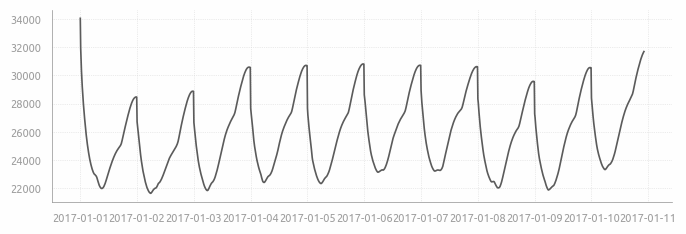

In [21]:
plt.plot(train['target1_cum_avg'][:143*10]);

In [22]:
train['target1_cum_avg'] = train['target1_cum_avg'].shift(1)

In [23]:
train[['target1', 'target1_cum_avg']]

,target1,target1_cum_avg
2017-01-01 00:00:00,34055.69620,NaN
2017-01-01 00:10:00,29814.68354,34055.696200
2017-01-01 00:20:00,29128.10127,31935.189870
2017-01-01 00:30:00,28228.86076,30999.493670
2017-01-01 00:40:00,27335.69620,30306.835442
...,...,...
2017-07-31 23:10:00,43407.30897,38477.324984
2017-07-31 23:20:00,42507.90698,38512.539156
2017-07-31 23:30:00,41659.53488,38540.875098
2017-07-31 23:40:00,40843.05648,38562.837490


In [24]:
scipy.stats.pearsonr(
    train['target1_cum_avg'][1:],
    train['target1'][1:]
)

PearsonRResult(statistic=0.5919214986544622, pvalue=0.0)

In [25]:
scipy.stats.pearsonr(
    train['target1_cum_avg'].shift()[2:],
    train['target1_cum_avg'][2:]
)

PearsonRResult(statistic=0.997255936836215, pvalue=0.0)

#### Median for previous dayweeks

In [26]:
train = train.join(train.groupby('weekday')['target1'].median(), on='weekday', rsuffix='_by_weekday')

#### Median for previous minutes

Value of 'target1' from previous month day-by-day

In [27]:
train['target1_by_minutes'] = generate_feature_by_minutes(train, 'target1', '2017-01')

In [28]:
train['target1_by_minutes']

2017-01-01 00:00:00            NaN
2017-01-01 00:10:00            NaN
2017-01-01 00:20:00            NaN
2017-01-01 00:30:00            NaN
2017-01-01 00:40:00            NaN
                          ...     
2017-07-31 23:10:00    40205.56291
2017-07-31 23:20:00    39423.57616
2017-07-31 23:30:00    38883.17881
2017-07-31 23:40:00    38107.54967
2017-07-31 23:50:00    37312.84768
Freq: 10min, Name: target1_by_minutes, Length: 30528, dtype: float64

In [29]:
len_values_of_the_first_month = len(train.loc['2017-01'])

In [30]:
len_values_of_the_first_month

4464

In [31]:
train['target1_by_minutes'][len_values_of_the_first_month-1:]

2017-01-31 23:50:00            NaN
2017-02-01 00:00:00    34055.69620
2017-02-01 00:10:00    29814.68354
2017-02-01 00:20:00    29128.10127
2017-02-01 00:30:00    28228.86076
                          ...     
2017-07-31 23:10:00    40205.56291
2017-07-31 23:20:00    39423.57616
2017-07-31 23:30:00    38883.17881
2017-07-31 23:40:00    38107.54967
2017-07-31 23:50:00    37312.84768
Freq: 10min, Name: target1_by_minutes, Length: 26065, dtype: float64

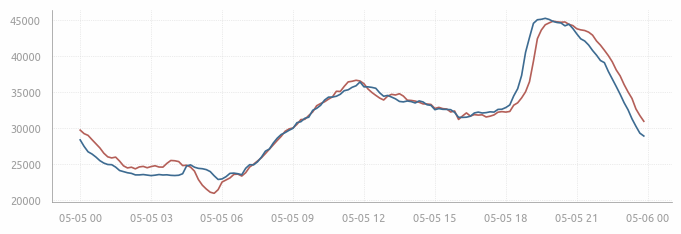

In [32]:
plt.plot(train.loc['2017-05-05', 'target1'], color=palette[1])
plt.plot(train.loc['2017-05-05', 'target1_by_minutes'], color=palette[2])

In [33]:
valid['target1_by_minutes'] = train.loc['2017-07-01':, 'target1'].values

In [34]:
valid

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3,minute,hour,...,weekday,week,month,year_month,year_day,count_elmnts_by_day,is_Friday,is_Sunday,is_31,target1_by_minutes
2017-08-01 00:00:00,24.82,77.2,4.903,0.099,0.082,38517.20311,26979.09187,31008.90282,0,0,...,1,31,8,2017-08,2017-08-01,1,0,0,0,36384.31894
2017-08-01 00:10:00,24.72,77.7,4.906,0.059,0.141,37973.80688,26416.47307,30713.98119,10,0,...,1,31,8,2017-08,2017-08-01,2,0,0,0,35689.03654
2017-08-01 00:20:00,24.64,77.7,4.904,0.062,0.156,37308.94562,26192.18585,30178.30721,20,0,...,1,31,8,2017-08,2017-08-01,3,0,0,0,34751.36213
2017-08-01 00:30:00,24.62,77.6,4.904,0.062,0.130,36164.61709,25599.15523,29666.70846,30,0,...,1,31,8,2017-08,2017-08-01,4,0,0,0,33954.01993
2017-08-01 00:40:00,24.59,77.7,4.907,0.073,0.144,35678.75694,25344.45618,29413.91850,40,0,...,1,31,8,2017-08,2017-08-01,5,0,0,0,33411.82724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31 23:10:00,22.31,72.6,4.920,0.095,0.078,38619.48946,22713.83316,19976.42633,10,23,...,3,35,8,2017-08,2017-08-31,140,0,0,1,43407.30897
2017-08-31 23:20:00,22.36,72.4,4.919,0.080,0.122,38370.16648,22006.75818,19476.86520,20,23,...,3,35,8,2017-08,2017-08-31,141,0,0,1,42507.90698
2017-08-31 23:30:00,22.34,72.1,4.920,0.102,0.122,37724.48391,21790.07392,19320.37618,30,23,...,3,35,8,2017-08,2017-08-31,142,0,0,1,41659.53488
2017-08-31 23:40:00,22.26,73.0,4.922,0.058,0.130,36874.22863,21265.46990,19133.79310,40,23,...,3,35,8,2017-08,2017-08-31,143,0,0,1,40843.05648


## Save Data

In [35]:
saveit(train, 'train', save_files)

File 'train.pkl' saved in directory 'files/02-feature-engineering/'


In [36]:
saveit(valid, 'valid', save_files)

File 'valid.pkl' saved in directory 'files/02-feature-engineering/'


In [37]:
saveit(test, 'test', save_files)

File 'test.pkl' saved in directory 'files/02-feature-engineering/'


### Save Session

In [38]:
save_session(session_name)

### Execution time

In [39]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:00:14
